In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
income_df = pd.read_csv('/home/student/IngajiDemo/dataset.csv')

In [21]:
# I have created a'Creditworthiness' column based on multiple conditions
income_df['Creditworthiness'] = np.where(
    (income_df['Total_Household_Income'] > 100000) &
    (income_df['Total_Food_Expenditure'] < 50000) &
    (income_df['Total_Number_of_Family_members'] <= 4),
    1,
    0
)

In [15]:
# Define features and target
features = ['Total_Household_Income', 'Total_Food_Expenditure', 'Main_Source_of_Income',
             'Housing_and_water_Expenditure', 'Imputed_House_Rental_Value', 'Medical_Care_Expenditure',
             'Transportation_Expenditure', 'Communication_Expenditure', 'Education_Expenditure',
             'Miscellaneous_Goods_and_Services_Expenditure', 'Crop_Farming_and_Gardening_expenses',
             'Total_Income_from_Entrepreneurial_Acitivites', 'Household_Head_Sex', 'Total_Number_of_Family_members',
             'Members_with_age_less_than_5_year_old', 'Members_with_age_5_-_17_years_old', 'Tenure_Status']

In [ ]:
# Extract features and target variable
X = income_df[features]
y = income_df['Creditworthiness']

In [9]:
income_df = income_df.drop(columns=columns_to_delete )

In [ ]:
print(income_df.columns)

## Column Description
1. Total_Household_Income- This column represents the total income earned by the household. It indicates a greater capacity for loan repayments.
2. Total_Food_Expenditure- This column shows how much the household spends on food.
3. Main_Source_of_Income- This indicates the primary source of income for the household. Regular and stable income sources (e.g., employment) typically have a positive impact on the credit score. 
4. Housing_and_water_Expenditure. This represents the spending on housing and water. High expenditure on housing might indicate that the household has higher living costs, which could impact their ability to repay loans.
5. This is an estimated value of the rent that would be paid if the household were renting instead of owning the home.
6. Medical_Care_Expenditure- This column indicates the amount spent on medical care. Medical expenses can be significant and variable, affecting the household’s disposable income.
7. Transportation_Expenditure- This shows how much is spent on transportation. High transportation costs may indicate the inability to repay loans.
8. Communication_Expenditure- This includes spending on communication services such as phone and internet. Excessive spending on non-essential services might indicate poor budgeting skills, which could negatively affect the credit score.
9. Education_Expenditure- High education expenses should be balanced with overall financial stability; excessive spending without adequate income may strain finances and affect creditworthiness.
10. Miscellaneous_Goods_and_Services_Expenditure- This covers other expenses not categorized elsewhere, like entertainment or personal care. It gives a broader view of discretionary spending and overall financial management.
11. Crop_Farming_and_Gardening_expenses- For households involved in agriculture, this expense reflects the costs associated with farming or gardening. Efficient management of these expenses, coupled with a stable income from farming, can support a good credit score. 
12. Total_Income_from_Entrepreneurial_Activities- Income from entrepreneurial activities can positively impact the credit score if it is stable and sufficient.
13. Total_Number_of_Family_members- The presence of young children typically increases household expenses. This can reduce the amount available for debt repayment, potentially impacting the credit score.
14. Members_with_age_less_than_5_Years_Old- High costs associated with education and child-rearing can strain finances.
15. Members_with_age_5_-_17_Years_Old - School-aged children add to the household’s financial responsibilities. While this is a necessary expense, high costs associated with education and child-rearing can strain finances.
16. Tenure_Status - Home ownership often positively affects the credit score because it typically indicates financial stability and a long-term commitment. 

In [5]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = income_df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(income_df[categorical_columns])

#I have created a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([income_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Expense data : \n{df_encoded}")

Encoded Expense data : 
       Total_Household_Income  Total_Food_Expenditure  \
0                      480332                  117848   
1                      198235                   67766   
2                       82785                   61609   
3                      107589                   78189   
4                      189322                   94625   
...                       ...                     ...   
41539                  119773                   44875   
41540                  137320                   31157   
41541                  133171                   45882   
41542                  129500                   81416   
41543                  128598                   78195   

       Housing_and_water_Expenditure  Imputed_House_Rental_Value  \
0                              63636                       30000   
1                              41370                       27000   
2                              14340                        7200   
3                  

In [9]:
print(income_df.columns)

Index(['Total_Household_Income', 'Total_Food_Expenditure',
       'Main_Source_of_Income', 'Housing_and_water_Expenditure',
       'Imputed_House_Rental_Value', 'Medical_Care_Expenditure',
       'Transportation_Expenditure', 'Communication_Expenditure',
       'Education_Expenditure', 'Miscellaneous_Goods_and_Services_Expenditure',
       'Crop_Farming_and_Gardening_expenses',
       'Total_Income_from_Entrepreneurial_Acitivites', 'Household_Head_Sex',
       'Total_Number_of_Family_members',
       'Members_with_age_less_than_5_year_old',
       'Members_with_age_5_-_17_years_old', 'Tenure_Status', 'Electricity'],
      dtype='object')


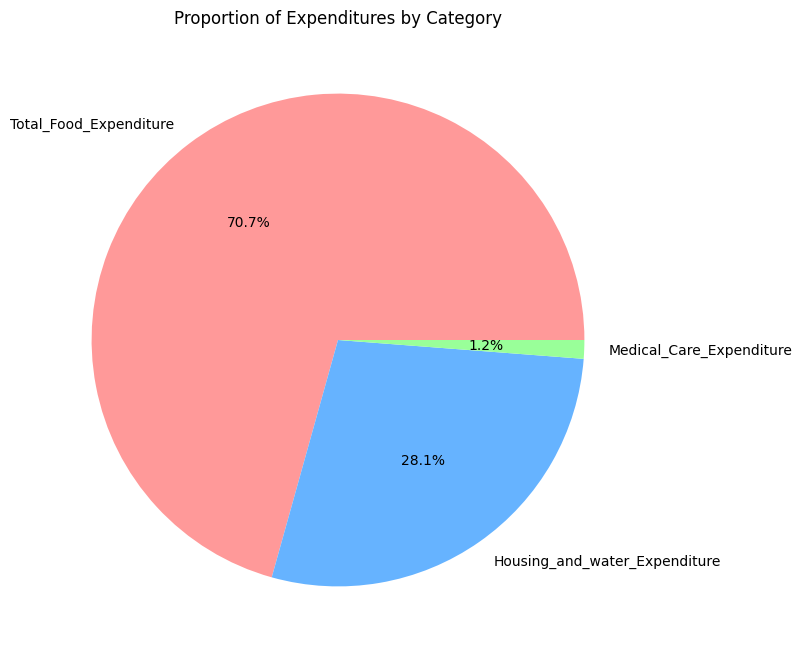

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation
data = {
    'Total_Food_Expenditure': [117848, 67766, 61609, 78189, 94625],
    'Housing_and_water_Expenditure': [63636, 41370, 14340, 16638, 31122],
    'Medical_Care_Expenditure': [3457, 3520, 70, 60, 140]
}

df = pd.DataFrame(data)

# Compute the total expenditure for each category
total_expenditures = df.sum()

plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(total_expenditures, labels=total_expenditures.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proportion of Expenditures by Category')
plt.show()


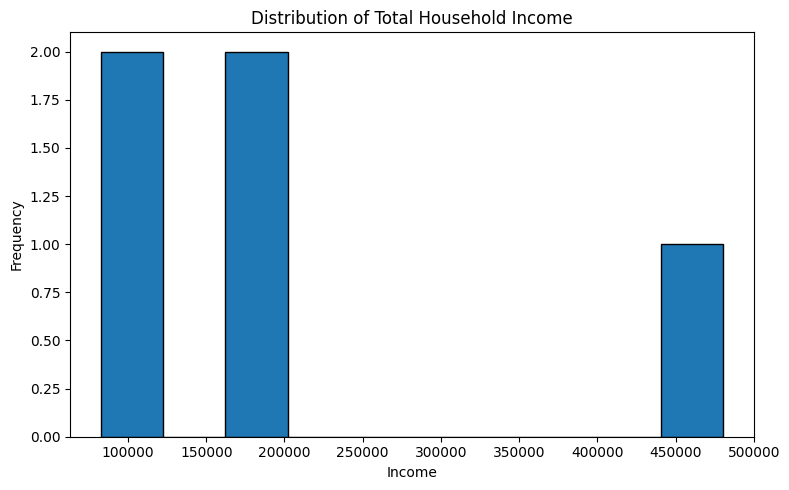

In [18]:
# Example DataFrame creation
data = {
    'Total_Household_Income': [480332, 198235, 82785, 107589, 189322]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.hist(df['Total_Household_Income'], bins=10, color='#1f77b4', edgecolor='black')
plt.title('Distribution of Total Household Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
features = [
    'Total_Household_Income', 'Total_Food_Expenditure', 'Housing_and_water_Expenditure',
    'Imputed_House_Rental_Value', 'Medical_Care_Expenditure', 'Transportation_Expenditure',
    'Communication_Expenditure', 'Education_Expenditure', 
    'Miscellaneous_Goods_and_Services_Expenditure',
    'Crop_Farming_and_Gardening_expenses', 'Total_Income_from_Entrepreneurial_Acitivites',
    'Total_Number_of_Family_members'
]

In [11]:
# Extract features for clustering
X = df_encoded[features]

In [12]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
def assign_credit_score(income):
    """Assign a credit score (0-100%) based on income percentile"""
    return np.clip(income.rank(pct=True) * 100, 0, 100)

In [15]:
def assign_loan_range(credit_score):
    """Assign a loan range based on credit score"""
    if credit_score < 20:
        return "1,000 - 5,000"
    elif credit_score < 40:
        return "5,001 - 10,000"
    elif credit_score < 60:
        return "10,001 - 20,000"
    elif credit_score < 80:
        return "20,001 - 35,000"
    else:
        return "35,001 - 50,000"

In [16]:
# Assign credit scores
df_encoded['Credit_Score'] = assign_credit_score(df_encoded['Total_Household_Income'])

In [17]:
df_encoded['Loan_Range'] = df_encoded['Credit_Score'].apply(assign_loan_range)

In [18]:
print("Sample of Results:")
print(df_encoded[['Total_Household_Income', 'Credit_Score', 'Loan_Range']].sample(10))

Sample of Results:
       Total_Household_Income  Credit_Score       Loan_Range
28257                  770255     96.163104  35,001 - 50,000
40444                   42741      2.135086    1,000 - 5,000
25145                   77970     12.512035    1,000 - 5,000
9202                   180690     55.036828  10,001 - 20,000
6094                   436334     86.999326  35,001 - 50,000
29853                  216440     63.412286  20,001 - 35,000
25087                   61784      6.710957    1,000 - 5,000
23892                  157955     47.893799  10,001 - 20,000
17348                  445212     87.502407  35,001 - 50,000
27092                 1170542     98.750722  35,001 - 50,000


In [19]:
# Overall statistics
print("\nOverall Statistics:")
print(f"Average Credit Score: {df_encoded['Credit_Score'].mean():.2f}%")
print(f"Median Credit Score: {df_encoded['Credit_Score'].median():.2f}%")
print("\nCredit Score Distribution:")
print(df_encoded['Credit_Score'].describe())


Overall Statistics:
Average Credit Score: 50.00%
Median Credit Score: 50.00%

Credit Score Distribution:
count    41544.000000
mean        50.001204
std         28.867861
min          0.002407
25%         25.001204
50%         50.001204
75%         75.000602
max        100.000000
Name: Credit_Score, dtype: float64
